<a href="https://colab.research.google.com/github/priscilalourinho/cobertura_vacinal_bootcamp_2/blob/main/Notebooks/BootCamp_Super_Desafio_M%C3%B3dulo_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Super Desafio Módulo II - BootCamp Alura Data Science III**  💻 🎲


---




# *   **Objetivo** 🎯
> Analisar os dados do plano de imunização nacional e entender se há alguma relação entre Coberturas Vacinas, e a quantidade de óbitos evitáveis para a região Sudeste do Brazil






---


# *   **Escopo** 📓
    > Cruzar os dados do plano de imunização nacional com informações de gastos hospitalares e óbitos evitáveis 


1.   Entender o comportamento das coberturas vacinais entre os anos de 2010 a 2019
2.   Verificar se existe relação com os óbitos 
3. Verificar se existe relação entre gastos maiores ou menores ao longo do tempo





---


# *   **Hipóteses** 💭


1.   Anos com maiores coberturas vacinais apresentam óbitos evitáveis em níveis menores
2.   Anos com maiores coberturas vacinais apresentam gastos com procedimentos hospitalares menores



---


# *  **Dados utilizados e Fontes de Origem** ℹ


1.  Valor serviços hospitalares por Ano/mês atendimento segundo Unidade da Federação
2.  Coberturas Vacinais por Ano segundo Unidade da Federação
3. Óbitos p/Ocorrênc por Unidade da Federação segundo Ano/mês do Óbito
*Todas as tabelas estão disponíveis no site ▶ https://datasus.saude.gov.br/informacoes-de-saude-tabnet/*
*Você pode acessar exatamente as tabelas que utilizei no meu Github ▶  https://github.com/priscilalourinho/priscilalourinho* 


---
# *** Observações Importantes** 🔎


1.   A fórmula de cálculo da cobertura vacinal é o número de doses aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela população alvo, multiplicado por 100. 



---
##*** Conclusões e Proposições** ✅💭
1.   Há uma forte ligação entre a cobertura vacinal e a quantidade de óbitos por causas evitáveis no período estudado
2.   Se faz necessário entender mais profundamente o que é contemplado nos gastos com procedimentos hospitalares 
    *   Se os gastos com procedimentos hospitalares envolver gastos com tratamento de doenças que um plano de vacinação poderia evitar ou mitigar, seria interessante coletar apenas essa parcela dos gastos e verificar como ela se comporta versus a cobertura vacinal e os óbitos por causas evitáveis



---

##*** Sobre a Autora** 👩


Sou Priscila Lourinho, tenho 31 anos e construi toda a minha carreira profissional em gestão de operações (distribuição de combustíveis, lubrificantes industriais e, atualmente, sou a coordenadora das oprações no Zé Delivery 💛

Nessa trajetória, que foi iniciada em 2013, sempre precisei lidar com muitos dados em níveis de granularidade diferentes.

Costumo dizer que toda operação funciona como um organismo vivo que deve ser constantemente monitorado para garantir que diagnósticos prévios sejam feitos de forma a evitar estresses de sistema, além da identificação de melhorias em processos e redução de custos. 

Foi nesse contexto que percebi que estava mergulhando, cada vez mais, no universo de dados e resolvi fazer esse bootcamp, a experiência tem sido sensacional.

Sou graduada em Engenharia de Produção pelo CEFET/RJ, com um MBA em Agronegócios pela USP/ESALQ. Atualmente, em paralelo com o bootcamp, estou cursando um MBA em Digital Business também pela USP/ESALQ. 

Estudar e aprender é uma das minhas paixões. 



































# **I - Tratamento do Data Frame sobre cobertura Vacinal** ❗

In [ ]:
# Importando os Data Frames extraídos do Tabnet
import pandas as pd
vacina = pd.read_csv("https://raw.githubusercontent.com/priscilalourinho/priscilalourinho/main/DB_Coberturas_Vacinais_por_Ano_e_UF.csv",encoding="ISO-8859-1",
                     sep=";",skiprows = 3, skipfooter = 20,
                    thousands = ".", decimal=",")
gastos = pd.read_csv("https://raw.githubusercontent.com/priscilalourinho/priscilalourinho/main/DB_Gastos_por_procedimento_Hospitalar_por_UF.csv",encoding="ISO-8859-1",
                     sep=";",skiprows = 3, skipfooter = 12,
                    thousands = ".", decimal=",")
obitos = pd.read_csv("https://raw.githubusercontent.com/priscilalourinho/priscilalourinho/main/DB_obitos_por_causas_evit%C3%A1veis_5_a_74_anos.csv",encoding="ISO-8859-1",
                     sep=";",skiprows = 3, skipfooter = 10,
                    thousands = ".", decimal=",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


**Retirando os 3 primeiros caracteres numéricos dos nomes das UFs**

In [ ]:
vacina["uf"] = vacina["Unidade da Federação"].str.slice(start=3)
vacina["Unidade da Federação"] = vacina["uf"]
vacina.head()

,Unidade da Federação,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,uf
0,Rondônia,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44,80.77,Rondônia
1,Acre,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44,63.93,Acre
2,Amazonas,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97,68.75,Amazonas
3,Roraima,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04,72.55,Roraima
4,Pará,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53,63.18,Pará


**Retirando as Colunas Total e uf**

In [ ]:

vacina = vacina.drop("Total", axis=1)
vacina = vacina.drop("uf",axis=1)
vacina.head()

,Unidade da Federação,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Rondônia,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44
1,Acre,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44
2,Amazonas,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97
3,Roraima,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04
4,Pará,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53


**Alterando o nome da Coluna Unidade ds Federação para uf**

In [ ]:
vacina = vacina.rename(columns={'Unidade da Federação':'uf'})
vacina = vacina.set_index("uf")
vacina.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,
Rondônia,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44
Acre,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44
Amazonas,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97
Roraima,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04
Pará,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53


**Selecionando apenas os estados que correspondem à região sudeste e alterando a estrutura do data frame (transponto a tabela) para que o plot dos dados saia demonstrando o comportamento de cada UF no decorrer do anos**

In [ ]:
vacina_sudeste = vacina.T[['Rio de Janeiro','São Paulo','Minas Gerais','Espírito Santo']]
vacina_sudeste.head()
vacina_sudeste = vacina_sudeste.T
vacina_sudeste.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,
Rio de Janeiro,67.48,83.91,73.71,68.11,84.08,96.14,47.98,67.04,61.37,25.99
São Paulo,70.36,84.96,77.28,73.37,88.20,98.63,45.94,67.29,71.52,46.18
Minas Gerais,80.85,87.40,82.73,80.04,90.21,100.33,57.58,80.42,85.42,53.43
Espírito Santo,74.74,88.35,79.71,72.30,90.98,98.39,51.19,66.35,74.22,48.72


**Alterando a estrutura do Data Frame através do .melt para utilizar a biblioteca seaborn e plots distintos**

In [ ]:
vacina_sudeste = vacina_sudeste.reset_index().melt(id_vars=["uf"], value_vars=vacina_sudeste.columns)
vacina_sudeste.head()

,uf,variable,value
0,Rio de Janeiro,2010,67.48
1,São Paulo,2010,70.36
2,Minas Gerais,2010,80.85
3,Espírito Santo,2010,74.74
4,Rio de Janeiro,2011,83.91


**Ajustando os nomes das colunas para tornar o novo dataframe mais intuitivo**

In [ ]:
vacina_sudeste = vacina_sudeste.rename(columns={'value':'cobertura vacinal'})
vacina_sudeste = vacina_sudeste.rename(columns={'variable':'Ano'})

# **II - Tratamento do Data Frame sobre óbitos por causas evitáveis e tratamento do Data Frame de Gastos por UF** ❗
**Observação:** 🔎
>"*As causas de mortes evitáveis ou reduzíveis são definidas como aquelas preveníveis, total ou parcialmente, por ações efetivas dos serviços de saúde que estejam acessíveis em um determinado local e época.*"



*   Fonte: *Lista de causas de mortes evitáveis por intervenções do Sistema Único de Saúde do Brasil* disponível em: http://scielo.iec.gov.br/pdf/ess/v16n4/v16n4a02.pdf










**Retirando os dois ".." do início do nome de cada mês/ano**

In [ ]:
obitos['Ano/mês do Óbito'] = obitos['Ano/mês do Óbito'].str.slice(start=2)

In [ ]:
obitos.head()

,Ano/mês do Óbito,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,10,4702,1841,8220,1107,20113,1372,4138,15445,9359,24827,8505,12714,32548,11484,6877,45067,70877,13159,74362,154689,41200,20919,44673,8860,10039,19643,8604,675344
1,Janeiro/2010,453,143,688,94,1645,90,342,1218,831,2182,744,1097,2786,935,588,3858,5833,1180,6532,12596,3301,1635,3712,749,898,1605,781,56516
2,Fevereiro/2010,381,137,607,83,1600,99,335,1146,723,1964,698,968,2518,886,538,3370,5397,1002,6032,12049,3235,1677,3572,662,748,1537,619,52583
3,Março/2010,382,161,665,104,1723,109,346,1276,756,2149,753,1094,2705,989,557,3682,5734,1119,6073,12633,3465,1666,3552,755,835,1599,695,55577
4,Abril/2010,382,140,650,82,1580,105,343,1272,801,2069,665,967,2570,970,630,3733,5667,1074,5997,12489,3261,1653,3420,707,807,1577,693,54304


**Transpondo o data frame para facilitar a retirada de colunas que não importam (colunas dos totais do anos que estão apenas com 2 algarismos numéricos em função do slice aplicado anteriormente**

In [ ]:
obitos = obitos.T
obitos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
Ano/mês do Óbito,10,Janeiro/2010,Fevereiro/2010,Março/2010,Abril/2010,Maio/2010,Junho/2010,Julho/2010,Agosto/2010,Setembro/2010,Outubro/2010,Novembro/2010,Dezembro/2010,11,Janeiro/2011,Fevereiro/2011,Março/2011,Abril/2011,Maio/2011,Junho/2011,Julho/2011,Agosto/2011,Setembro/2011,Outubro/2011,Novembro/2011,Dezembro/2011,12,Janeiro/2012,Fevereiro/2012,Março/2012,Abril/2012,Maio/2012,Junho/2012,Julho/2012,Agosto/2012,Setembro/2012,Outubro/2012,Novembro/2012,Dezembro/2012,13,...,Dezembro/2016,17,Janeiro/2017,Fevereiro/2017,Março/2017,Abril/2017,Maio/2017,Junho/2017,Julho/2017,Agosto/2017,Setembro/2017,Outubro/2017,Novembro/2017,Dezembro/2017,18,Janeiro/2018,Fevereiro/2018,Março/2018,Abril/2018,Maio/2018,Junho/2018,Julho/2018,Agosto/2018,Setembro/2018,Outubro/2018,Novembro/2018,Dezembro/2018,19,Janeiro/2019,Fevereiro/2019,Março/2019,Abril/2019,Maio/2019,Junho/2019,Julho/2019,Agosto/2019,Setembro/2019,Outubro/2019,Novembro/2019,Dezembro/2019
RO,4702,453,381,382,382,422,337,384,397,402,405,369,388,4506,387,333,406,369,383,345,383,358,378,402,374,388,4971,433,418,402,387,420,379,386,416,447,464,409,410,4765,...,403,5169,417,403,464,433,435,419,485,422,447,438,402,404,5044,409,367,426,402,441,395,423,430,462,414,424,451,5115,461,369,442,458,430,421,418,411,442,394,439,430
AC,1841,143,137,161,140,160,174,160,137,170,156,145,158,1929,163,153,153,130,167,156,161,182,172,172,168,152,2045,174,179,194,172,180,146,159,176,154,178,184,149,2071,...,245,2405,178,196,232,122,203,182,212,245,207,197,206,225,2555,231,202,239,235,220,208,243,202,199,192,178,206,2483,208,187,215,221,222,183,199,204,211,190,217,226
AM,8220,688,607,665,650,688,606,698,728,678,691,734,787,8717,763,678,780,693,697,726,731,754,689,786,701,719,8984,740,755,775,752,820,747,780,725,698,754,742,696,9092,...,851,10444,943,868,898,833,888,839,925,907,815,856,823,849,10725,886,766,877,893,958,954,915,846,897,990,818,925,11185,875,913,958,903,949,898,967,991,912,978,893,948
RR,1107,94,83,104,82,89,97,87,97,100,106,85,83,1047,72,79,84,85,85,88,86,99,94,88,92,95,1098,94,67,80,84,108,85,89,98,101,98,97,97,1258,...,117,1580,152,95,105,115,144,139,153,142,136,131,131,137,1764,146,114,142,136,146,167,134,150,181,174,153,121,1762,152,131,147,150,135,126,162,161,156,147,153,142


**Retirando as colunas equivalentes aos totais dos anos de 2010 até 2019. Decidi não transformar a coluna "Ano/mês do Óbito" em index ainda pois posso utilizar o índice para identificar melhor a posição das colunas que correspondem aos totais dos anos que quero retirar.**

**Exemplo:O total de 2010 está localizado na coluna de índice "0" (Zero), o total de 2011 está 13 colunas a frente na coluna 13, para cada ano o índice da coluna evolui em progressão aritmética de ordem 13 (an = a1+(n-1)*r). Como estamos falando de 10 anos a10 = 0+(10-1)x13 = 117. Ou seja o total do último ano 2019 está na coluna de índice 117**


In [ ]:
obitos = obitos.drop(0,axis=1)
obitos.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
Ano/mês do Óbito,Janeiro/2010,Fevereiro/2010,Março/2010,Abril/2010,Maio/2010,Junho/2010,Julho/2010,Agosto/2010,Setembro/2010,Outubro/2010,Novembro/2010,Dezembro/2010,11,Janeiro/2011,Fevereiro/2011,Março/2011,Abril/2011,Maio/2011,Junho/2011,Julho/2011,Agosto/2011,Setembro/2011,Outubro/2011,Novembro/2011,Dezembro/2011,12,Janeiro/2012,Fevereiro/2012,Março/2012,Abril/2012,Maio/2012,Junho/2012,Julho/2012,Agosto/2012,Setembro/2012,Outubro/2012,Novembro/2012,Dezembro/2012,13,Janeiro/2013,...,Dezembro/2016,17,Janeiro/2017,Fevereiro/2017,Março/2017,Abril/2017,Maio/2017,Junho/2017,Julho/2017,Agosto/2017,Setembro/2017,Outubro/2017,Novembro/2017,Dezembro/2017,18,Janeiro/2018,Fevereiro/2018,Março/2018,Abril/2018,Maio/2018,Junho/2018,Julho/2018,Agosto/2018,Setembro/2018,Outubro/2018,Novembro/2018,Dezembro/2018,19,Janeiro/2019,Fevereiro/2019,Março/2019,Abril/2019,Maio/2019,Junho/2019,Julho/2019,Agosto/2019,Setembro/2019,Outubro/2019,Novembro/2019,Dezembro/2019
RO,453,381,382,382,422,337,384,397,402,405,369,388,4506,387,333,406,369,383,345,383,358,378,402,374,388,4971,433,418,402,387,420,379,386,416,447,464,409,410,4765,428,...,403,5169,417,403,464,433,435,419,485,422,447,438,402,404,5044,409,367,426,402,441,395,423,430,462,414,424,451,5115,461,369,442,458,430,421,418,411,442,394,439,430
AC,143,137,161,140,160,174,160,137,170,156,145,158,1929,163,153,153,130,167,156,161,182,172,172,168,152,2045,174,179,194,172,180,146,159,176,154,178,184,149,2071,177,...,245,2405,178,196,232,122,203,182,212,245,207,197,206,225,2555,231,202,239,235,220,208,243,202,199,192,178,206,2483,208,187,215,221,222,183,199,204,211,190,217,226
AM,688,607,665,650,688,606,698,728,678,691,734,787,8717,763,678,780,693,697,726,731,754,689,786,701,719,8984,740,755,775,752,820,747,780,725,698,754,742,696,9092,781,...,851,10444,943,868,898,833,888,839,925,907,815,856,823,849,10725,886,766,877,893,958,954,915,846,897,990,818,925,11185,875,913,958,903,949,898,967,991,912,978,893,948
RR,94,83,104,82,89,97,87,97,100,106,85,83,1047,72,79,84,85,85,88,86,99,94,88,92,95,1098,94,67,80,84,108,85,89,98,101,98,97,97,1258,96,...,117,1580,152,95,105,115,144,139,153,142,136,131,131,137,1764,146,114,142,136,146,167,134,150,181,174,153,121,1762,152,131,147,150,135,126,162,161,156,147,153,142


**Tentei criar uma função que acumulasse a contagem de saltos entre as colunas para fazer a operação, mas creio ter errado algo na sintaxe**


> df contador():

    > Conta = 0 
    > while conta < 118
       > conta = conta + 13
    > return conta


In [ ]:
obitos = obitos.drop(13,axis=1)
obitos = obitos.drop(26,axis=1)
obitos = obitos.drop(39,axis=1)
obitos = obitos.drop(52,axis=1)
obitos = obitos.drop(65,axis=1)
obitos = obitos.drop(78,axis=1)
obitos = obitos.drop(91,axis=1)
obitos = obitos.drop(104,axis=1)
obitos = obitos.drop(117,axis=1)
obitos.head()

,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,...,87,88,89,90,92,93,94,95,96,97,98,99,100,101,102,103,105,106,107,108,109,110,111,112,113,114,115,116,118,119,120,121,122,123,124,125,126,127,128,129
Ano/mês do Óbito,Janeiro/2010,Fevereiro/2010,Março/2010,Abril/2010,Maio/2010,Junho/2010,Julho/2010,Agosto/2010,Setembro/2010,Outubro/2010,Novembro/2010,Dezembro/2010,Janeiro/2011,Fevereiro/2011,Março/2011,Abril/2011,Maio/2011,Junho/2011,Julho/2011,Agosto/2011,Setembro/2011,Outubro/2011,Novembro/2011,Dezembro/2011,Janeiro/2012,Fevereiro/2012,Março/2012,Abril/2012,Maio/2012,Junho/2012,Julho/2012,Agosto/2012,Setembro/2012,Outubro/2012,Novembro/2012,Dezembro/2012,Janeiro/2013,Fevereiro/2013,Março/2013,Abril/2013,...,Setembro/2016,Outubro/2016,Novembro/2016,Dezembro/2016,Janeiro/2017,Fevereiro/2017,Março/2017,Abril/2017,Maio/2017,Junho/2017,Julho/2017,Agosto/2017,Setembro/2017,Outubro/2017,Novembro/2017,Dezembro/2017,Janeiro/2018,Fevereiro/2018,Março/2018,Abril/2018,Maio/2018,Junho/2018,Julho/2018,Agosto/2018,Setembro/2018,Outubro/2018,Novembro/2018,Dezembro/2018,Janeiro/2019,Fevereiro/2019,Março/2019,Abril/2019,Maio/2019,Junho/2019,Julho/2019,Agosto/2019,Setembro/2019,Outubro/2019,Novembro/2019,Dezembro/2019
RO,453,381,382,382,422,337,384,397,402,405,369,388,387,333,406,369,383,345,383,358,378,402,374,388,433,418,402,387,420,379,386,416,447,464,409,410,428,364,409,427,...,427,454,422,403,417,403,464,433,435,419,485,422,447,438,402,404,409,367,426,402,441,395,423,430,462,414,424,451,461,369,442,458,430,421,418,411,442,394,439,430
AC,143,137,161,140,160,174,160,137,170,156,145,158,163,153,153,130,167,156,161,182,172,172,168,152,174,179,194,172,180,146,159,176,154,178,184,149,177,165,169,171,...,180,219,167,245,178,196,232,122,203,182,212,245,207,197,206,225,231,202,239,235,220,208,243,202,199,192,178,206,208,187,215,221,222,183,199,204,211,190,217,226
AM,688,607,665,650,688,606,698,728,678,691,734,787,763,678,780,693,697,726,731,754,689,786,701,719,740,755,775,752,820,747,780,725,698,754,742,696,781,695,798,729,...,850,797,786,851,943,868,898,833,888,839,925,907,815,856,823,849,886,766,877,893,958,954,915,846,897,990,818,925,875,913,958,903,949,898,967,991,912,978,893,948
RR,94,83,104,82,89,97,87,97,100,106,85,83,72,79,84,85,85,88,86,99,94,88,92,95,94,67,80,84,108,85,89,98,101,98,97,97,96,100,124,107,...,100,115,113,117,152,95,105,115,144,139,153,142,136,131,131,137,146,114,142,136,146,167,134,150,181,174,153,121,152,131,147,150,135,126,162,161,156,147,153,142


**Transpondo novamente o data frame para facilitar a retirada das UFs que não correspondem à região Sudeste**

In [ ]:
obitos = obitos.T
obitos.head()

,Ano/mês do Óbito,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
1,Janeiro/2010,453,143,688,94,1645,90,342,1218,831,2182,744,1097,2786,935,588,3858,5833,1180,6532,12596,3301,1635,3712,749,898,1605,781,56516
2,Fevereiro/2010,381,137,607,83,1600,99,335,1146,723,1964,698,968,2518,886,538,3370,5397,1002,6032,12049,3235,1677,3572,662,748,1537,619,52583
3,Março/2010,382,161,665,104,1723,109,346,1276,756,2149,753,1094,2705,989,557,3682,5734,1119,6073,12633,3465,1666,3552,755,835,1599,695,55577
4,Abril/2010,382,140,650,82,1580,105,343,1272,801,2069,665,967,2570,970,630,3733,5667,1074,5997,12489,3261,1653,3420,707,807,1577,693,54304
5,Maio/2010,422,160,688,89,1547,111,324,1372,812,2155,734,1028,2752,975,623,3918,6108,1099,6203,13268,3557,1833,3641,713,888,1610,748,57378


**Selecionando apenas as UFs correspondentes à região Sudeste**

In [ ]:
obitos_sudeste = obitos[["Ano/mês do Óbito","RJ","SP","MG","ES"]]
obitos_sudeste = obitos_sudeste.rename(columns={'Ano/mês do Óbito':'ano/mes'})
obitos_sudeste.head()

,ano/mes,RJ,SP,MG,ES
1,Janeiro/2010,6532,12596,5833,1180
2,Fevereiro/2010,6032,12049,5397,1002
3,Março/2010,6073,12633,5734,1119
4,Abril/2010,5997,12489,5667,1074
5,Maio/2010,6203,13268,6108,1099


In [ ]:
obitos_sudeste = obitos_sudeste.set_index("ano/mes")
obitos_sudeste.head()

,RJ,SP,MG,ES
ano/mes,,,,
Janeiro/2010,6532,12596,5833,1180
Fevereiro/2010,6032,12049,5397,1002
Março/2010,6073,12633,5734,1119
Abril/2010,5997,12489,5667,1074
Maio/2010,6203,13268,6108,1099


In [ ]:
obitos_aberto = obitos_sudeste.reset_index().melt(id_vars=["ano/mes"], value_vars=obitos_sudeste.columns)
obitos_aberto.head()

,ano/mes,variable,value
0,Janeiro/2010,RJ,6532
1,Fevereiro/2010,RJ,6032
2,Março/2010,RJ,6073
3,Abril/2010,RJ,5997
4,Maio/2010,RJ,6203


In [ ]:
obitos_aberto = obitos_aberto.rename(columns={'variable':'uf','value':'obitos'})
obitos_aberto["mes"] = obitos_aberto["ano/mes"].str[:-5]
obitos_aberto["ano"] = obitos_aberto["ano/mes"].str[-4:]
obitos_aberto.head()

,ano/mes,uf,obitos,mes,ano
0,Janeiro/2010,RJ,6532,Janeiro,2010
1,Fevereiro/2010,RJ,6032,Fevereiro,2010
2,Março/2010,RJ,6073,Março,2010
3,Abril/2010,RJ,5997,Abril,2010
4,Maio/2010,RJ,6203,Maio,2010


In [ ]:
obitos_ano = obitos_aberto.groupby("ano").sum()
obitos_ano = obitos_ano.drop("ano/mes",axis=1)
obitos_ano = obitos_ano.drop("uf",axis=1)
obitos_ano = obitos_ano.drop("mes",axis=1)
obitos_ano

,obitos
ano,
2010,313087
2011,315486
2012,313997
2013,318461
2014,318950
2015,321793
2016,334413
2017,329057
2018,332103


## **II.1 - Tratamento do Data Frame de Gastos por UF** ❗

In [ ]:
gastos.head()

,Unidade da Federação,1992/Mar,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Abr,2000/Mai,2000/Jun,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,6402890.58,5530345.33,5735228.77,5594697.63,5717217.91,7002110.79,6506712.17,6460048.83,6434526.00,6544809.83,6632214.50,6278791.51,6881636.61,6432627.22,6551624.69,6787552.89,6218127.26,7114108.65,6691124.37,7632481.39,6532585.50,7230844.27,7306218.99,6688732.24,6704434.57,6935181.27,6523446.38,6728278.77,6926785.40,7248783.96,7380160.02,7593776.54,6873539.46,7193014.74,7158294.37,6597593.23,6278797.60,4963799.28,2104163.13,6.288604e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2230724.18,2390077.13,2442515.04,2279059.54,2391531.43,2735707.52,2124469.58,2368276.04,2549734.19,2700015.83,2550236.08,2537249.04,2537609.27,2376114.08,1972834.77,2272774.80,2112033.20,2316789.58,2164181.23,2453401.63,2351930.83,2527967.28,2301939.70,2237202.86,2388420.99,1885609.79,1737540.19,1988572.90,1712023.99,1880225.82,2272423.89,2316539.32,2455798.36,2624866.04,2111474.77,2004251.26,1890353.90,1463905.85,645586.73,2.644901e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,9330416.05,8233464.87,9150013.34,9301628.24,8970961.79,10396878.44,10567237.62,10621804.57,10562386.32,11083495.21,10519977.85,10685455.22,10553424.06,10321970.60,10507023.34,11130141.62,9829866.09,11308796.75,11228413.37,11884129.71,11383519.94,12016061.65,12712217.15,11843765.09,12532670.97,10941524.17,11065012.59,11898600.09,10982948.88,12534725.04,12600055.09,12842678.43,12081568.25,12943886.34,12784069.75,11686211.55,11662382.99,7585301.55,2987113.15,1.102090e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1795076.58,1657923.41,1846423.44,1825604.26,1707909.55,1974713.60,1797871.99,2092514.42,2042609.50,2032792.88,2164722.92,2043382.01,2011074.58,1991973.62,2005377.48,2046182.47,1845583.33,1976493.60,2014664.07,2103171.16,2217428.46,2118771.94,2490326.20,2116165.01,2197263.96,1866456.75,1807675.85,1979221.16,1864720.66,2124056.64,2042417.49,2127333.58,2007842.61,2154454.09,2383966.38,2272371.62,2295426.76,1927686.12,924299.93,1.894594e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,23039537.93,23177548.20,22521549.32,24260633.16,21695062.20,26151055.14,23506513.34,26017517.87,24336480.88,24533245.06,25639501.97,24987018.68,25366139.90,25299032.82,24144182.03,25663370.20,23444971.09,26162811.95,26801115.39,27197492.50,25994370.97,25970935.04,26843371.56,25768228.06,27701493.69,25205712.77,24876064.90,26406224.21,24361536.76,25450311.38,23766443.42,23698523.77,21529783.45,27721288.35,27602046.23,27162624.86,24381384.74,18950821.11,10506917.06,2.725012e+09


In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
gastos.mean()

2009/Ago       717759.20
2009/Set      1305450.66
2009/Out      3703003.78
2009/Nov      8045354.31
2009/Dez     15776484.07
                ...     
2019/Set     37677186.88
2019/Out     35337401.45
2019/Nov     27089686.74
2019/Dez     13658681.35
Total      3915364398.81
Length: 126, dtype: float64

In [ ]:
colunas_usaveis = gastos.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',
 '2014/Mai',
 '2014/Jun',
 '2014/Jul',
 '2014/Ago',
 '2014/Set',
 '2014/Out',
 '2014/Nov',
 '2014/Dez',
 '2015/Jan',
 '2015/Fev',
 '2015/Mar',
 '2015/Abr',
 '2015/Mai',
 '2015/Jun',
 '2015/Jul',
 '2015/Ago',
 '2015/Set',
 '2015/Out',


In [ ]:
gastos_usaveis = gastos[colunas_usaveis]
gastos_usaveis["uf"] = gastos_usaveis["Unidade da Federação"].str.slice(start=3)
gastos_usaveis.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unidade da Federação,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,...,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total,uf
0,11 Rondônia,28158.87,90932.63,369597.39,754431.11,1478043.92,3024388.58,3112817.60,3727820.59,3615567.36,3837200.54,3490420.38,3701948.14,3550594.05,3709898.50,3569084.54,3519637.60,3511967.18,3350502.87,3419732.11,3740663.17,4080915.85,3755186.49,3737159.40,3440358.34,3779671.60,3310876.33,3445157.85,3465175.86,3201957.44,3541806.84,3497780.16,3859591.73,3644975.87,3636820.86,3525113.67,3256864.65,3426553.83,3198150.35,3375459.73,...,5530345.33,5735228.77,5594697.63,5717217.91,7002110.79,6506712.17,6460048.83,6434526.00,6544809.83,6632214.50,6278791.51,6881636.61,6432627.22,6551624.69,6787552.89,6218127.26,7114108.65,6691124.37,7632481.39,6532585.50,7230844.27,7306218.99,6688732.24,6704434.57,6935181.27,6523446.38,6728278.77,6926785.40,7248783.96,7380160.02,7593776.54,6873539.46,7193014.74,7158294.37,6597593.23,6278797.60,4963799.28,2104163.13,628860426.21,Rondônia
1,12 Acre,7740.22,37352.08,164679.59,464316.10,905727.82,1808823.59,1581859.94,1913894.59,1957734.61,1923035.88,1754774.04,1718544.84,1847752.52,1939898.69,1975790.51,1912433.80,1895006.42,2089815.15,1869187.34,2122686.72,2022542.64,2367073.38,2069122.04,2147502.58,2240069.94,2136917.89,2100842.65,2068473.78,2080621.00,2108143.42,1882752.68,2324761.76,2115886.78,2138989.28,2129256.71,2233375.27,2118947.51,2340259.20,2318952.51,...,2390077.13,2442515.04,2279059.54,2391531.43,2735707.52,2124469.58,2368276.04,2549734.19,2700015.83,2550236.08,2537249.04,2537609.27,2376114.08,1972834.77,2272774.80,2112033.20,2316789.58,2164181.23,2453401.63,2351930.83,2527967.28,2301939.70,2237202.86,2388420.99,1885609.79,1737540.19,1988572.90,1712023.99,1880225.82,2272423.89,2316539.32,2455798.36,2624866.04,2111474.77,2004251.26,1890353.90,1463905.85,645586.73,264490139.90,Acre
2,13 Amazonas,32304.01,200720.88,1820983.84,3186057.29,5435097.60,7191769.76,6403353.80,7932713.42,7788766.25,7656853.96,7148304.33,7074434.33,7241175.54,7437877.69,7583162.51,7274434.71,7139285.35,7484141.00,7225528.91,8442447.01,8150433.00,7796345.89,7641552.07,7676616.98,7542257.53,7488213.87,7744281.70,8185237.87,6615772.42,7636771.78,6861793.93,8593169.53,8112362.37,8918198.08,8234906.52,8472599.93,8280371.85,7266897.69,7614338.24,...,8233464.87,9150013.34,9301628.24,8970961.79,10396878.44,10567237.62,10621804.57,10562386.32,11083495.21,10519977.85,10685455.22,10553424.06,10321970.60,10507023.34,11130141.62,9829866.09,11308796.75,11228413.37,11884129.71,11383519.94,12016061.65,12712217.15,11843765.09,12532670.97,10941524.17,11065012.59,11898600.09,10982948.88,12534725.04,12600055.09,12842678.43,12081568.25,12943886.34,12784069.75,11686211.55,11662382.99,7585301.55,2987113.15,1102089945.35,Amazonas
3,14 Roraima,365.13,38861.88,147313.29,404308.52,658058.52,1203722.97,1095997.10,1368271.00,1300698.18,1496328.37,1415669.83,1424923.29,1548515.26,1446850.70,1297243.88,1141127.99,1104806.07,1204872.32,929763.92,991529.89,1063516.18,1251245.73,1352923.73,1241116.84,1220675.13,1333398.61,1393228.13,1224338.78,1189261.30,1191015.61,1201675.89,1303170.75,1175541.89,1497563.69,1336892.67,1314323.00,1364172.33,1210521.65,986321.05,...,1657923.41,1846423.44,1825604.26,1707909.55,1974713.60,1797871.99,2092514.42,2042609.50,2032792.88,2164722.92,2043382.01,2011074.58,1991973.62,2005377.48,2046182.47,184558

In [ ]:
gastos_usaveis["Unidade da Federação"] = gastos_usaveis["uf"]
gastos_usaveis.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unidade da Federação,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,...,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total,uf
0,Rondônia,28158.87,90932.63,369597.39,754431.11,1478043.92,3024388.58,3112817.60,3727820.59,3615567.36,3837200.54,3490420.38,3701948.14,3550594.05,3709898.50,3569084.54,3519637.60,3511967.18,3350502.87,3419732.11,3740663.17,4080915.85,3755186.49,3737159.40,3440358.34,3779671.60,3310876.33,3445157.85,3465175.86,3201957.44,3541806.84,3497780.16,3859591.73,3644975.87,3636820.86,3525113.67,3256864.65,3426553.83,3198150.35,3375459.73,...,5530345.33,5735228.77,5594697.63,5717217.91,7002110.79,6506712.17,6460048.83,6434526.00,6544809.83,6632214.50,6278791.51,6881636.61,6432627.22,6551624.69,6787552.89,6218127.26,7114108.65,6691124.37,7632481.39,6532585.50,7230844.27,7306218.99,6688732.24,6704434.57,6935181.27,6523446.38,6728278.77,6926785.40,7248783.96,7380160.02,7593776.54,6873539.46,7193014.74,7158294.37,6597593.23,6278797.60,4963799.28,2104163.13,628860426.21,Rondônia
1,Acre,7740.22,37352.08,164679.59,464316.10,905727.82,1808823.59,1581859.94,1913894.59,1957734.61,1923035.88,1754774.04,1718544.84,1847752.52,1939898.69,1975790.51,1912433.80,1895006.42,2089815.15,1869187.34,2122686.72,2022542.64,2367073.38,2069122.04,2147502.58,2240069.94,2136917.89,2100842.65,2068473.78,2080621.00,2108143.42,1882752.68,2324761.76,2115886.78,2138989.28,2129256.71,2233375.27,2118947.51,2340259.20,2318952.51,...,2390077.13,2442515.04,2279059.54,2391531.43,2735707.52,2124469.58,2368276.04,2549734.19,2700015.83,2550236.08,2537249.04,2537609.27,2376114.08,1972834.77,2272774.80,2112033.20,2316789.58,2164181.23,2453401.63,2351930.83,2527967.28,2301939.70,2237202.86,2388420.99,1885609.79,1737540.19,1988572.90,1712023.99,1880225.82,2272423.89,2316539.32,2455798.36,2624866.04,2111474.77,2004251.26,1890353.90,1463905.85,645586.73,264490139.90,Acre
2,Amazonas,32304.01,200720.88,1820983.84,3186057.29,5435097.60,7191769.76,6403353.80,7932713.42,7788766.25,7656853.96,7148304.33,7074434.33,7241175.54,7437877.69,7583162.51,7274434.71,7139285.35,7484141.00,7225528.91,8442447.01,8150433.00,7796345.89,7641552.07,7676616.98,7542257.53,7488213.87,7744281.70,8185237.87,6615772.42,7636771.78,6861793.93,8593169.53,8112362.37,8918198.08,8234906.52,8472599.93,8280371.85,7266897.69,7614338.24,...,8233464.87,9150013.34,9301628.24,8970961.79,10396878.44,10567237.62,10621804.57,10562386.32,11083495.21,10519977.85,10685455.22,10553424.06,10321970.60,10507023.34,11130141.62,9829866.09,11308796.75,11228413.37,11884129.71,11383519.94,12016061.65,12712217.15,11843765.09,12532670.97,10941524.17,11065012.59,11898600.09,10982948.88,12534725.04,12600055.09,12842678.43,12081568.25,12943886.34,12784069.75,11686211.55,11662382.99,7585301.55,2987113.15,1102089945.35,Amazonas
3,Roraima,365.13,38861.88,147313.29,404308.52,658058.52,1203722.97,1095997.10,1368271.00,1300698.18,1496328.37,1415669.83,1424923.29,1548515.26,1446850.70,1297243.88,1141127.99,1104806.07,1204872.32,929763.92,991529.89,1063516.18,1251245.73,1352923.73,1241116.84,1220675.13,1333398.61,1393228.13,1224338.78,1189261.30,1191015.61,1201675.89,1303170.75,1175541.89,1497563.69,1336892.67,1314323.00,1364172.33,1210521.65,986321.05,...,1657923.41,1846423.44,1825604.26,1707909.55,1974713.60,1797871.99,2092514.42,2042609.50,2032792.88,2164722.92,2043382.01,2011074.58,1991973.62,2005377.48,2046182.47,1845583.33,1976493

In [ ]:
gastos_usaveis = gastos_usaveis.drop("uf",axis=1)
gastos_usaveis = gastos_usaveis.drop("Total",axis=1)
gastos_usaveis.head()

,Unidade da Federação,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
0,Rondônia,28158.87,90932.63,369597.39,754431.11,1478043.92,3024388.58,3112817.60,3727820.59,3615567.36,3837200.54,3490420.38,3701948.14,3550594.05,3709898.50,3569084.54,3519637.60,3511967.18,3350502.87,3419732.11,3740663.17,4080915.85,3755186.49,3737159.40,3440358.34,3779671.60,3310876.33,3445157.85,3465175.86,3201957.44,3541806.84,3497780.16,3859591.73,3644975.87,3636820.86,3525113.67,3256864.65,3426553.83,3198150.35,3375459.73,...,6034037.57,6402890.58,5530345.33,5735228.77,5594697.63,5717217.91,7002110.79,6506712.17,6460048.83,6434526.00,6544809.83,6632214.50,6278791.51,6881636.61,6432627.22,6551624.69,6787552.89,6218127.26,7114108.65,6691124.37,7632481.39,6532585.50,7230844.27,7306218.99,6688732.24,6704434.57,6935181.27,6523446.38,6728278.77,6926785.40,7248783.96,7380160.02,7593776.54,6873539.46,7193014.74,7158294.37,6597593.23,6278797.60,4963799.28,2104163.13
1,Acre,7740.22,37352.08,164679.59,464316.10,905727.82,1808823.59,1581859.94,1913894.59,1957734.61,1923035.88,1754774.04,1718544.84,1847752.52,1939898.69,1975790.51,1912433.80,1895006.42,2089815.15,1869187.34,2122686.72,2022542.64,2367073.38,2069122.04,2147502.58,2240069.94,2136917.89,2100842.65,2068473.78,2080621.00,2108143.42,1882752.68,2324761.76,2115886.78,2138989.28,2129256.71,2233375.27,2118947.51,2340259.20,2318952.51,...,2422709.18,2230724.18,2390077.13,2442515.04,2279059.54,2391531.43,2735707.52,2124469.58,2368276.04,2549734.19,2700015.83,2550236.08,2537249.04,2537609.27,2376114.08,1972834.77,2272774.80,2112033.20,2316789.58,2164181.23,2453401.63,2351930.83,2527967.28,2301939.70,2237202.86,2388420.99,1885609.79,1737540.19,1988572.90,1712023.99,1880225.82,2272423.89,2316539.32,2455798.36,2624866.04,2111474.77,2004251.26,1890353.90,1463905.85,645586.73
2,Amazonas,32304.01,200720.88,1820983.84,3186057.29,5435097.60,7191769.76,6403353.80,7932713.42,7788766.25,7656853.96,7148304.33,7074434.33,7241175.54,7437877.69,7583162.51,7274434.71,7139285.35,7484141.00,7225528.91,8442447.01,8150433.00,7796345.89,7641552.07,7676616.98,7542257.53,7488213.87,7744281.70,8185237.87,6615772.42,7636771.78,6861793.93,8593169.53,8112362.37,8918198.08,8234906.52,8472599.93,8280371.85,7266897.69,7614338.24,...,8896450.15,9330416.05,8233464.87,9150013.34,9301628.24,8970961.79,10396878.44,10567237.62,10621804.57,10562386.32,11083495.21,10519977.85,10685455.22,10553424.06,10321970.60,10507023.34,11130141.62,9829866.09,11308796.75,11228413.37,11884129.71,11383519.94,12016061.65,12712217.15,11843765.09,12532670.97,10941524.17,11065012.59,11898600.09,10982948.88,12534725.04,12600055.09,12842678.43,12081568.25,12943886.34,12784069.75,11686211.55,11662382.99,7585301.55,2987113.15
3,Roraima,365.13,38861.88,147313.29,404308.52,658058.52,1203722.97,1095997.10,1368271.00,1300698.18,1496328.37,1415669.83,1424923.29,1548515.26,1446850.70,1297243.88,1141127.99,1104806.07,1204872.32,929763.92,991529.89,1063516.18,1251245.73,1352923.73,1241116.84,1220675.13,1333398.61,1393228.13,1224338.78,1189261.30,1191015.61,1201675.89,1303170.75,1175541.89,1497563.69,1336892.67,1314323.00,1364172.33,1210521.65,986321.05,...,1679211.41,1795076.58,1657923.41,1846423.44,1825604.26,1707909.55,1974713.60,1797871.99,2092514.42,2042609.50,2032792.88,2164722.92,2043382.01,2011074.58,1991973.62,200537

In [ ]:
gastos_usaveis = gastos_usaveis.rename(columns={'Unidade da Federação':'uf'})
gastos_usaveis = gastos_usaveis.set_index("uf")
gastos_usaveis.head()

,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,28158.87,90932.63,369597.39,754431.11,1478043.92,3024388.58,3112817.60,3727820.59,3615567.36,3837200.54,3490420.38,3701948.14,3550594.05,3709898.50,3569084.54,3519637.60,3511967.18,3350502.87,3419732.11,3740663.17,4080915.85,3755186.49,3737159.40,3440358.34,3779671.60,3310876.33,3445157.85,3465175.86,3201957.44,3541806.84,3497780.16,3859591.73,3644975.87,3636820.86,3525113.67,3256864.65,3426553.83,3198150.35,3375459.73,3267327.23,...,6034037.57,6402890.58,5530345.33,5735228.77,5594697.63,5717217.91,7002110.79,6506712.17,6460048.83,6434526.00,6544809.83,6632214.50,6278791.51,6881636.61,6432627.22,6551624.69,6787552.89,6218127.26,7114108.65,6691124.37,7632481.39,6532585.50,7230844.27,7306218.99,6688732.24,6704434.57,6935181.27,6523446.38,6728278.77,6926785.40,7248783.96,7380160.02,7593776.54,6873539.46,7193014.74,7158294.37,6597593.23,6278797.60,4963799.28,2104163.13
Acre,7740.22,37352.08,164679.59,464316.10,905727.82,1808823.59,1581859.94,1913894.59,1957734.61,1923035.88,1754774.04,1718544.84,1847752.52,1939898.69,1975790.51,1912433.80,1895006.42,2089815.15,1869187.34,2122686.72,2022542.64,2367073.38,2069122.04,2147502.58,2240069.94,2136917.89,2100842.65,2068473.78,2080621.00,2108143.42,1882752.68,2324761.76,2115886.78,2138989.28,2129256.71,2233375.27,2118947.51,2340259.20,2318952.51,2157292.89,...,2422709.18,2230724.18,2390077.13,2442515.04,2279059.54,2391531.43,2735707.52,2124469.58,2368276.04,2549734.19,2700015.83,2550236.08,2537249.04,2537609.27,2376114.08,1972834.77,2272774.80,2112033.20,2316789.58,2164181.23,2453401.63,2351930.83,2527967.28,2301939.70,2237202.86,2388420.99,1885609.79,1737540.19,1988572.90,1712023.99,1880225.82,2272423.89,2316539.32,2455798.36,2624866.04,2111474.77,2004251.26,1890353.90,1463905.85,645586.73
Amazonas,32304.01,200720.88,1820983.84,3186057.29,5435097.60,7191769.76,6403353.80,7932713.42,7788766.25,7656853.96,7148304.33,7074434.33,7241175.54,7437877.69,7583162.51,7274434.71,7139285.35,7484141.00,7225528.91,8442447.01,8150433.00,7796345.89,7641552.07,7676616.98,7542257.53,7488213.87,7744281.70,8185237.87,6615772.42,7636771.78,6861793.93,8593169.53,8112362.37,8918198.08,8234906.52,8472599.93,8280371.85,7266897.69,7614338.24,7606354.38,...,8896450.15,9330416.05,8233464.87,9150013.34,9301628.24,8970961.79,10396878.44,10567237.62,10621804.57,10562386.32,11083495.21,10519977.85,10685455.22,10553424.06,10321970.60,10507023.34,11130141.62,9829866.09,11308796.75,11228413.37,11884129.71,11383519.94,12016061.65,12712217.15,11843765.09,12532670.97,10941524.17,11065012.59,11898600.09,10982948.88,12534725.04,12600055.09,12842678.43,12081568.25,12943886.34,12784069.75,11686211.55,11662382.99,7585301.55,2987113.15
Roraima,365.13,38861.88,147313.29,404308.52,658058.52,1203722.97,1095997.10,1368271.00,1300698.18,1496328.37,1415669.83,1424923.29,1548515.26,1446850.70,1297243.88,1141127.99,1104806.07,1204872.32,929763.92,991529.89,1063516.18,1251245.73,1352923.73,1241116.84,1220675.13,1333398.61,1393228.13,1224338.78,1189261.30,1191015.61,1201675.89,1303170.75,1175541.89,1497563.69,1336892.67,1314323.00,1364172.33,1210521.65,986321.05,1173306.50,...,1679211.41,1795076.58,1657923.41,1846423.44,1825604.26,1707909.

In [ ]:
gastos_usaveis = gastos_usaveis.T
gastos_sudeste = gastos_usaveis[["Rio de Janeiro","São Paulo","Espírito Santo","Minas Gerais"]]
gastos_sudeste.head()

uf,Rio de Janeiro,São Paulo,Espírito Santo,Minas Gerais
2009/Ago,4333167.62,5668500.30,311906.83,1810743.37
2009/Set,4388822.91,11934871.59,528205.66,3602026.57
2009/Out,8226843.95,28831488.27,1882289.67,11353917.10
2009/Nov,16323024.87,63271247.20,4473422.00,22448768.21
2009/Dez,23610441.93,108230164.80,8516126.59,48401841.76


In [ ]:
gastos_sudeste = gastos_sudeste / 1000000
gastos_sudeste.T

,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rio de Janeiro,4.33,4.39,8.23,16.32,23.61,45.90,36.14,43.68,65.29,45.26,41.60,43.68,46.92,43.62,42.25,40.16,41.05,61.03,49.58,43.99,44.56,47.08,43.96,43.53,46.34,42.54,42.66,39.84,38.59,54.76,37.50,47.28,43.12,48.55,44.86,45.16,47.05,42.42,46.40,41.50,...,51.10,51.45,47.74,49.27,54.85,48.95,55.97,51.50,59.07,55.60,58.38,58.80,53.74,57.00,54.08,52.84,56.19,50.75,59.04,58.98,63.11,60.37,61.45,62.78,57.96,62.04,58.23,56.60,63.37,58.32,59.41,59.92,64.22,60.53,68.19,65.00,61.51,55.40,40.70,20.59
São Paulo,5.67,11.93,28.83,63.27,108.23,173.50,158.54,193.95,179.87,188.44,182.56,182.36,202.57,181.33,193.98,181.02,169.68,183.69,177.14,193.40,184.10,200.59,189.44,192.61,198.18,187.31,186.91,179.67,167.89,189.76,175.40,196.31,184.97,201.30,188.04,196.02,201.64,190.30,225.50,180.83,...,213.32,214.06,206.82,199.64,217.60,198.27,231.13,211.57,234.20,220.12,226.77,240.05,212.49,228.22,211.92,206.92,223.32,201.59,225.77,227.08,231.94,221.72,226.85,234.74,220.52,238.03,219.96,210.68,231.91,212.22,225.90,232.77,245.78,223.94,243.85,239.80,229.56,220.28,175.75,91.44
Espírito Santo,0.31,0.53,1.88,4.47,8.52,11.15,10.33,13.38,12.04,12.64,12.05,12.70,13.59,12.78,13.22,12.93,12.18,12.50,12.21,13.78,12.82,13.75,13.77,13.60,15.05,13.14,13.79,13.77,12.85,13.39,13.08,14.54,13.36,14.66,14.17,15.58,15.25,15.18,15.08,14.04,...,19.23,19.83,19.65,20.42,20.15,18.11,21.69,20.04,21.39,20.29,20.80,21.41,20.29,21.53,20.20,19.47,20.43,18.09,20.07,20.72,21.92,19.54,20.52,20.37,19.40,20.79,19.44,19.71,20.16,19.77,21.48,20.79,22.79,20.47,22.50,23.24,21.35,19.67,13.77,6.82
Minas Gerais,1.81,3.60,11.35,22.45,48.40,77.81,73.38,86.70,81.78,85.41,80.75,83.75,87.35,84.29,80.75,81.65,80.10,86.60,82.42,88.97,85.03,92.24,88.18,88.14,91.94,87.85,89.43,85.96,86.52,96.79,85.97,97.78,90.35,100.82,93.02,98.44,99.39,92.07,98.02,90.02,...,109.77,111.67,104.54,107.54,112.54,104.35,120.81,110.20,123.65,116.36,118.60,125.02,113.91,118.63,113.36,110.56,118.31,105.31,121.63,120.97,123.68,120.86,125.84,128.83,117.25,126.10,118.66,116.89,123.71,114.49,122.17,126.92,131.04,123.49,133.62,128.83,121.20,116.19,88.50,46.59


In [ ]:
gastos_sudeste = gastos_sudeste.T
gastos_sudeste.head()

,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rio de Janeiro,4.33,4.39,8.23,16.32,23.61,45.90,36.14,43.68,65.29,45.26,41.60,43.68,46.92,43.62,42.25,40.16,41.05,61.03,49.58,43.99,44.56,47.08,43.96,43.53,46.34,42.54,42.66,39.84,38.59,54.76,37.50,47.28,43.12,48.55,44.86,45.16,47.05,42.42,46.40,41.50,...,51.10,51.45,47.74,49.27,54.85,48.95,55.97,51.50,59.07,55.60,58.38,58.80,53.74,57.00,54.08,52.84,56.19,50.75,59.04,58.98,63.11,60.37,61.45,62.78,57.96,62.04,58.23,56.60,63.37,58.32,59.41,59.92,64.22,60.53,68.19,65.00,61.51,55.40,40.70,20.59
São Paulo,5.67,11.93,28.83,63.27,108.23,173.50,158.54,193.95,179.87,188.44,182.56,182.36,202.57,181.33,193.98,181.02,169.68,183.69,177.14,193.40,184.10,200.59,189.44,192.61,198.18,187.31,186.91,179.67,167.89,189.76,175.40,196.31,184.97,201.30,188.04,196.02,201.64,190.30,225.50,180.83,...,213.32,214.06,206.82,199.64,217.60,198.27,231.13,211.57,234.20,220.12,226.77,240.05,212.49,228.22,211.92,206.92,223.32,201.59,225.77,227.08,231.94,221.72,226.85,234.74,220.52,238.03,219.96,210.68,231.91,212.22,225.90,232.77,245.78,223.94,243.85,239.80,229.56,220.28,175.75,91.44
Espírito Santo,0.31,0.53,1.88,4.47,8.52,11.15,10.33,13.38,12.04,12.64,12.05,12.70,13.59,12.78,13.22,12.93,12.18,12.50,12.21,13.78,12.82,13.75,13.77,13.60,15.05,13.14,13.79,13.77,12.85,13.39,13.08,14.54,13.36,14.66,14.17,15.58,15.25,15.18,15.08,14.04,...,19.23,19.83,19.65,20.42,20.15,18.11,21.69,20.04,21.39,20.29,20.80,21.41,20.29,21.53,20.20,19.47,20.43,18.09,20.07,20.72,21.92,19.54,20.52,20.37,19.40,20.79,19.44,19.71,20.16,19.77,21.48,20.79,22.79,20.47,22.50,23.24,21.35,19.67,13.77,6.82
Minas Gerais,1.81,3.60,11.35,22.45,48.40,77.81,73.38,86.70,81.78,85.41,80.75,83.75,87.35,84.29,80.75,81.65,80.10,86.60,82.42,88.97,85.03,92.24,88.18,88.14,91.94,87.85,89.43,85.96,86.52,96.79,85.97,97.78,90.35,100.82,93.02,98.44,99.39,92.07,98.02,90.02,...,109.77,111.67,104.54,107.54,112.54,104.35,120.81,110.20,123.65,116.36,118.60,125.02,113.91,118.63,113.36,110.56,118.31,105.31,121.63,120.97,123.68,120.86,125.84,128.83,117.25,126.10,118.66,116.89,123.71,114.49,122.17,126.92,131.04,123.49,133.62,128.83,121.20,116.19,88.50,46.59


In [ ]:
gastos_sudeste = gastos_sudeste.reset_index().melt(id_vars=["uf"], value_vars=gastos_sudeste.columns)
gastos_sudeste.head()

,uf,variable,value
0,Rio de Janeiro,2009/Ago,4.33
1,São Paulo,2009/Ago,5.67
2,Espírito Santo,2009/Ago,0.31
3,Minas Gerais,2009/Ago,1.81
4,Rio de Janeiro,2009/Set,4.39


In [ ]:
gastos_sudeste = gastos_sudeste.rename(columns={'variable':'ano/mes','value':'gasto'})
gastos_sudeste.head()

,uf,ano/mes,gasto
0,Rio de Janeiro,2009/Ago,4.33
1,São Paulo,2009/Ago,5.67
2,Espírito Santo,2009/Ago,0.31
3,Minas Gerais,2009/Ago,1.81
4,Rio de Janeiro,2009/Set,4.39


In [ ]:
gastos_sudeste["mes"] = gastos_sudeste["ano/mes"].str[-3:]
gastos_sudeste["ano"] = gastos_sudeste["ano/mes"].str[:-4]
gastos_sudeste.head()

,uf,ano/mes,gasto,mes,ano
0,Rio de Janeiro,2009/Ago,4.33,Ago,2009
1,São Paulo,2009/Ago,5.67,Ago,2009
2,Espírito Santo,2009/Ago,0.31,Ago,2009
3,Minas Gerais,2009/Ago,1.81,Ago,2009
4,Rio de Janeiro,2009/Set,4.39,Set,2009


In [ ]:
gastos_sudeste_ano = gastos_sudeste.drop("mes",axis=1)
gastos_sudeste_ano.head()

,uf,ano/mes,gasto,ano
0,Rio de Janeiro,2009/Ago,4.33,2009
1,São Paulo,2009/Ago,5.67,2009
2,Espírito Santo,2009/Ago,0.31,2009
3,Minas Gerais,2009/Ago,1.81,2009
4,Rio de Janeiro,2009/Set,4.39,2009


In [ ]:
gastos_sudeste_ano = gastos_sudeste_ano.drop("ano/mes",axis=1)
gastos_sudeste_ano.head()

,uf,gasto,ano
0,Rio de Janeiro,4.33,2009
1,São Paulo,5.67,2009
2,Espírito Santo,0.31,2009
3,Minas Gerais,1.81,2009
4,Rio de Janeiro,4.39,2009


In [ ]:
gastos_sudeste_ano = gastos_sudeste_ano.groupby(["uf","ano"]).sum().reset_index()
gastos_sudeste_ano.head()

,uf,ano,gasto
0,Espírito Santo,2009,15.71
1,Espírito Santo,2010,148.99
2,Espírito Santo,2011,161.05
3,Espírito Santo,2012,172.71
4,Espírito Santo,2013,187.12


In [ ]:
gasto_ano_fechado = gastos_sudeste_ano.drop("uf", axis=1)
gasto_ano_fechado = gasto_ano_fechado.groupby("ano").sum().reset_index()
gasto_ano_fechado

,ano,gasto
0,2009,378.15
1,2010,3856.09
2,2011,3998.95
3,2012,4144.58
4,2013,4444.48
5,2014,4639.37
6,2015,4691.65
7,2016,4759.17
8,2017,4933.39
9,2018,5075.05



# **Evolutivo da Cobertura Vacinal nas Cidades do Sudeste do Brasil**
**Observações importantes sobre o gráfico abaixo** 🔎
*   Grande pico observado em 2015 (Aumento dos investimentos para aquisição de
imunobiológicos, que cresce progressivamente tendo sido de 415 milhões de reais em 2013 contra 2,9 bilhões de reais em 2014)

> *Fonte: Programa Nacional de Imunização - Coberturas Vacinais no Brasil 2010 - 2014 (disponível em: https://portalarquivos2.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf)*


*   As quedas observadas após 2015 são pautadas pelo sucesso dos programas de imunização realizados no passado. Os quais abrangeram indivíduos que atualmente estão com 30, 40 ou 50 anos. Essa população vivenciou o sucesso e a eficácia dos programas de imunização e, por não observarem os efeitos das doenças se alastrando, acabam reduzindo sua atenção à imunização.
*   Outro aspecto que influencia é o modelo de atenção à saúde que prioriza condições agudas de saúde, o que é opositor ao conceito de atenção primária à saúde

> *Fonte: Conselho Nacional dos Secretários de Saúde Consensus. Artigo de  25 de Outubro de 2017 publicado em: https://www.conass.org.br/consensus/queda-da-imunizacao-brasil/*









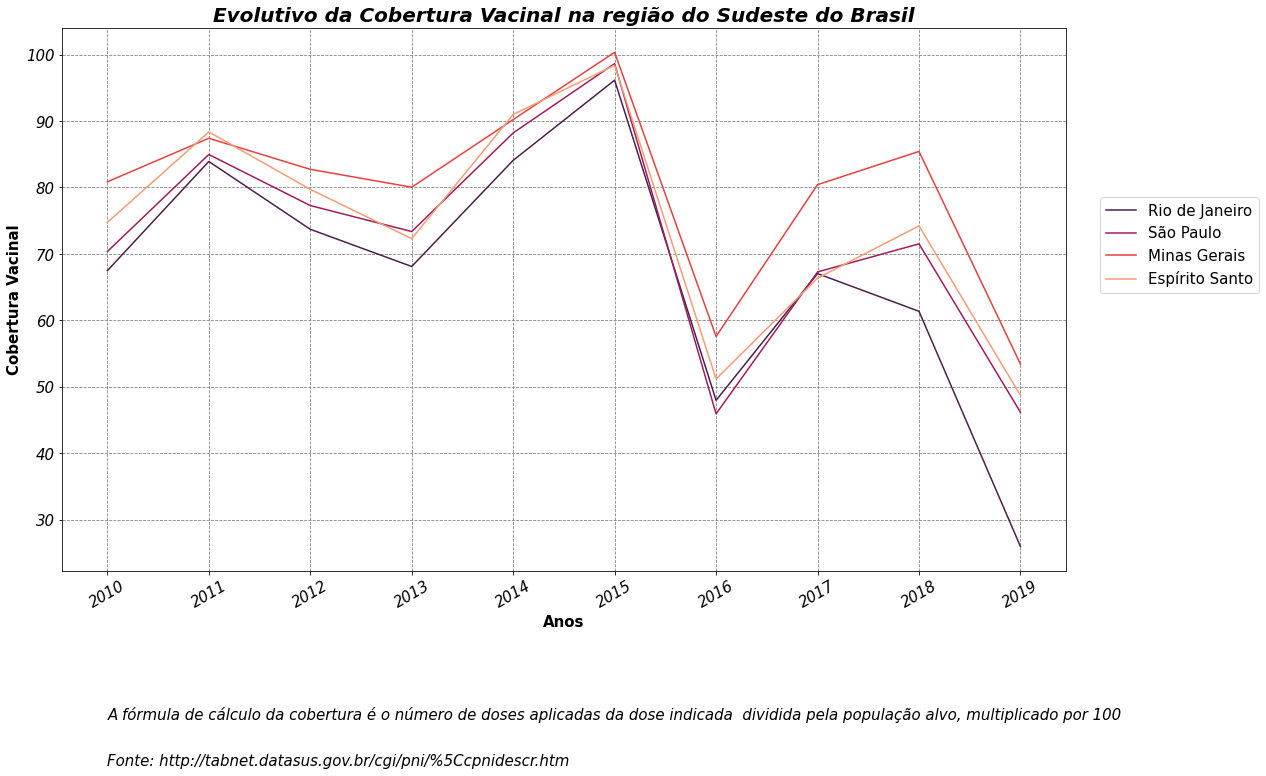

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.figure(figsize=(18,10))
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax = sns.lineplot(data=vacina_sudeste, x="Ano",y="cobertura vacinal",hue="uf",palette='rocket')
ax.set_title('Evolutivo da Cobertura Vacinal na região do Sudeste do Brasil', fontsize=20, fontstyle='oblique',fontweight=800)
ax.set_ylabel('Cobertura Vacinal', fontsize=15, fontweight=600)
ax.set_xlabel('Anos', fontsize=15, fontweight=600)
ax.text(00, 00, 'A fórmula de cálculo da cobertura é o número de doses aplicadas da dose indicada  dividida pela população alvo, multiplicado por 100', fontsize=15,fontstyle='oblique')
ax.text(0, -7, 'Fonte: http://tabnet.datasus.gov.br/cgi/pni/%5Ccpnidescr.htm ', fontsize=15,fontstyle='oblique')
plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
plt.grid(True, linestyle = "--", color='gray')
plt.show()

# **Comportamento dos óbitos por causas evitáveis na região Sudeste e nos estados de São Paulo, Rio de Janeiro, Minas Gerais e Espírito Santo entre 2010 e 2019** :

**Observações Importantes** 🔎

*   2016 foi caracterizado pela epidemia de Zika Vírus no Brasil, a qual teve início no ano de 2015
*   Os estados de São Paulo e Rio de Janeiro apresentam picos no mesmo período, contribuindo para que o comportamento anual dos óbitos por causas evitáveis da Região Sudeste tenha seu pico no mesmo período. Porém para os estados de Minas Gerais e Espírito Santo, os picos de óbitos ocorrem no ano subsequente
*   2016 foi o período de maior taxa de redução de cobertura vacinal, com isso podemos inferir que aliàda à epidemia de Zika Vírus, a baixa cobertura vacinal possui relação com o aumento de óbitos por causas evitáveis





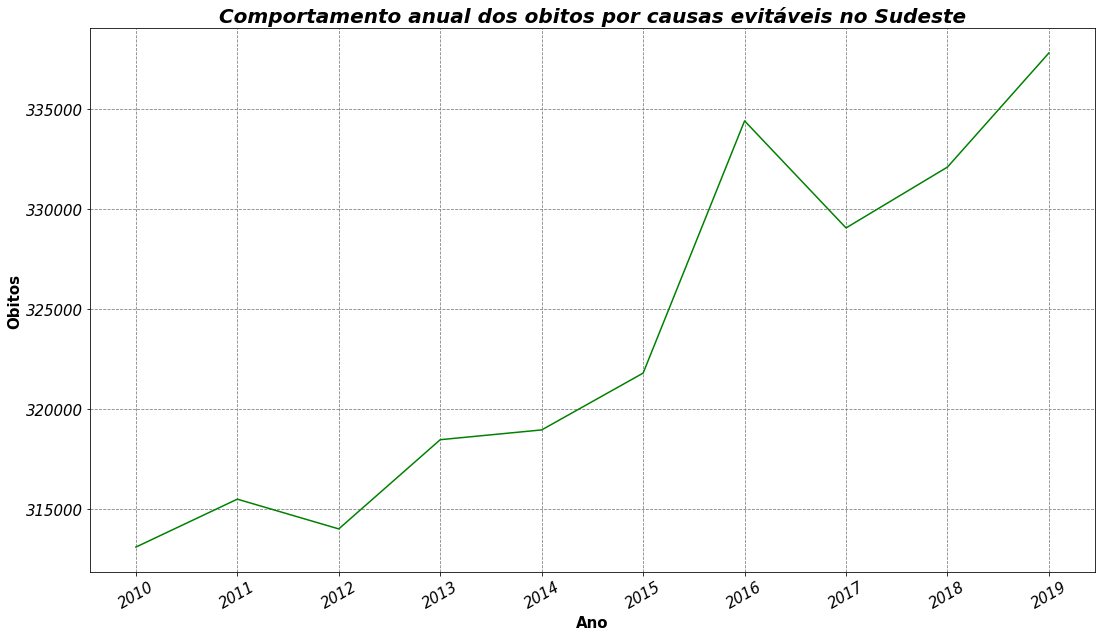

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax = sns.lineplot(data=obitos_ano, x="ano",y="obitos", color='Green')
ax.set_title('Comportamento anual dos obitos por causas evitáveis no Sudeste', fontsize=20, fontstyle='oblique',fontweight=800)
ax.set_ylabel('Obitos', fontsize=15, fontweight=600)
ax.set_xlabel('Ano', fontsize=15, fontweight=600)
plt.grid(True, linestyle = "--", color='gray')
plt.show()

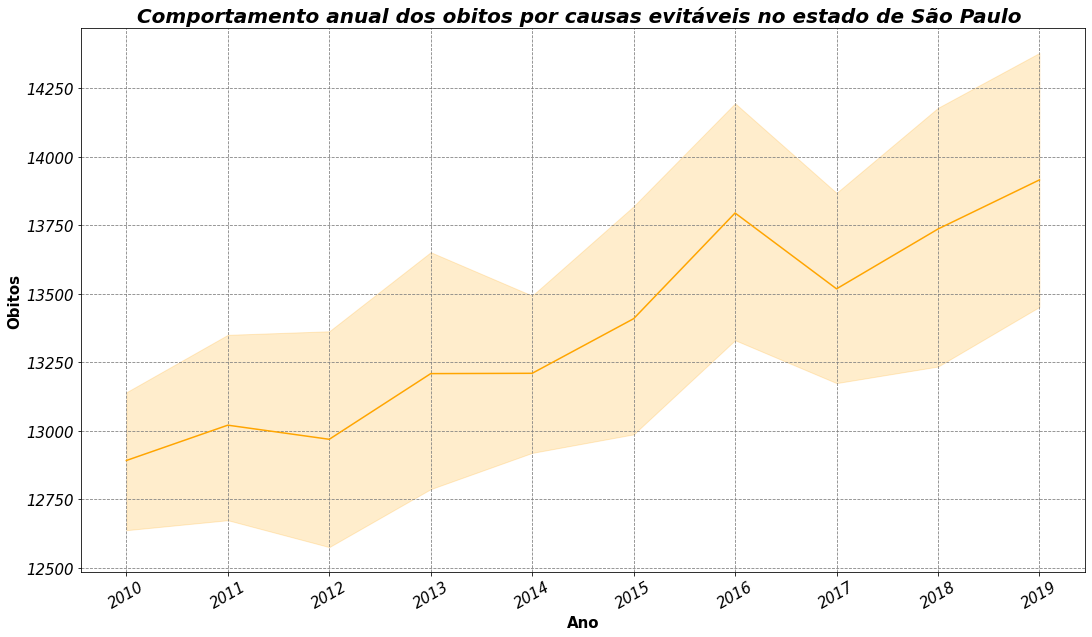

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax = sns.lineplot(data=obitos_aberto.query("uf == 'SP'"), x="ano",y="obitos", color='orange')
ax.set_title('Comportamento anual dos obitos por causas evitáveis no estado de São Paulo ', fontsize=20, fontstyle='oblique',fontweight=800)
ax.set_ylabel('Obitos', fontsize=15, fontweight=600)
ax.set_xlabel('Ano', fontsize=15, fontweight=600)
plt.grid(True, linestyle = "--", color='gray')
plt.show()

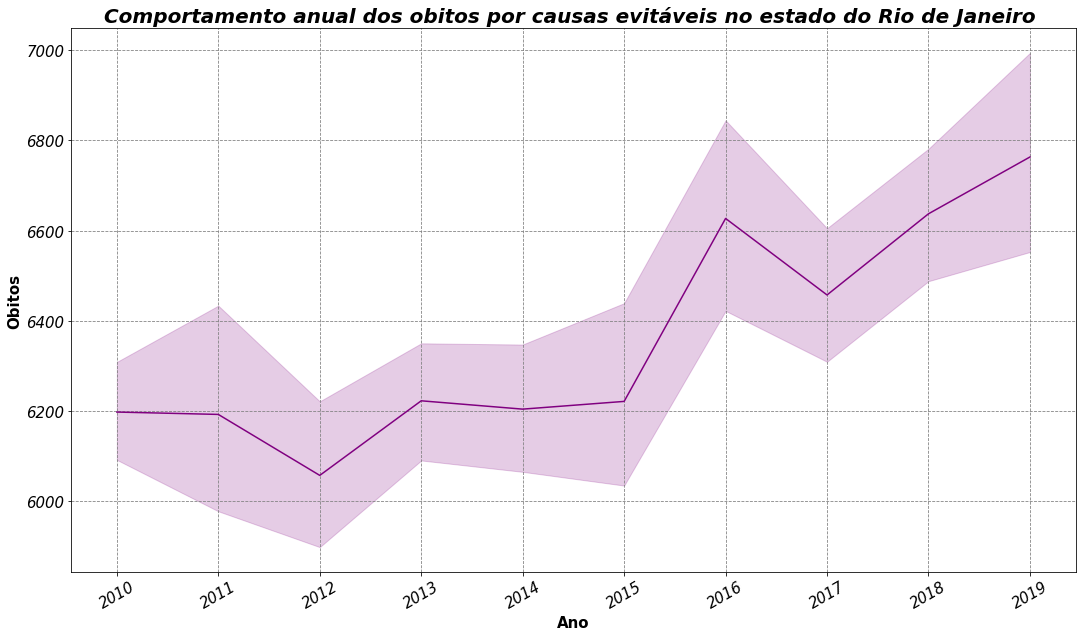

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax = sns.lineplot(data=obitos_aberto.query("uf == 'RJ'"), x="ano",y="obitos",color='purple')
ax.set_title('Comportamento anual dos obitos por causas evitáveis no estado do Rio de Janeiro ', fontsize=20, fontstyle='oblique',fontweight=800,)
ax.set_ylabel('Obitos', fontsize=15, fontweight=600)
ax.set_xlabel('Ano', fontsize=15, fontweight=600)
plt.grid(True, linestyle = "--", color='gray')
plt.show()

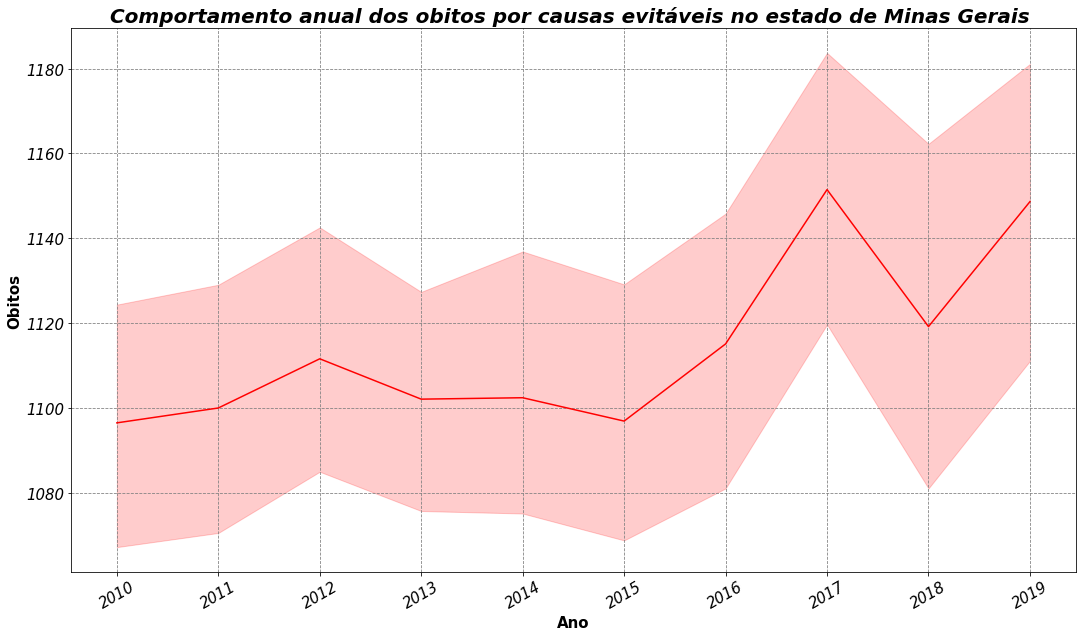

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax = sns.lineplot(data=obitos_aberto.query("uf == 'ES'"), x="ano",y="obitos", color='red')
ax.set_title('Comportamento anual dos obitos por causas evitáveis no estado de Minas Gerais ', fontsize=20, fontstyle='oblique',fontweight=800, )
ax.set_ylabel('Obitos', fontsize=15, fontweight=600)
ax.set_xlabel('Ano', fontsize=15, fontweight=600)
plt.grid(True, linestyle = "--", color='gray')
plt.show()

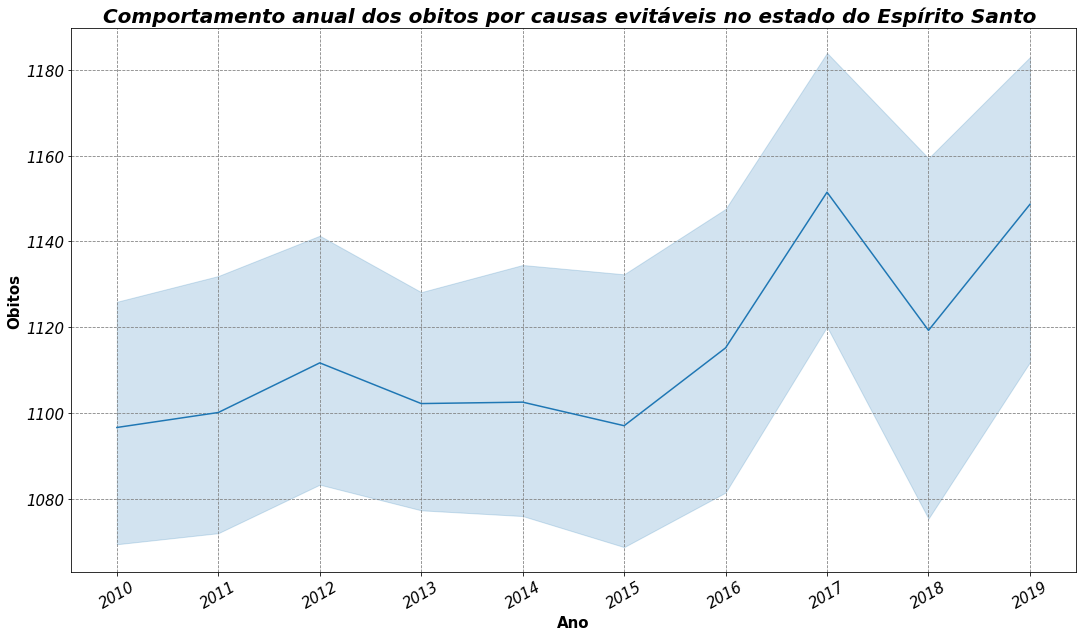

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax = sns.lineplot(data=obitos_aberto.query("uf == 'ES'"), x="ano",y="obitos")
ax.set_title('Comportamento anual dos obitos por causas evitáveis no estado do Espírito Santo ', fontsize=20, fontstyle='oblique',fontweight=800)
ax.set_ylabel('Obitos', fontsize=15, fontweight=600)
ax.set_xlabel('Ano', fontsize=15, fontweight=600)
plt.grid(True, linestyle = "--", color='gray')
plt.show()

# **Comportamento dos Gastos Anuais com procedimentos hospitalares em Milhões de Reais**

**Observações Importantes** 🔎


*   Primeiro, foi mostrado o evolutivo dos gastos da região sudeste como um todo, para tentar identificar se os gastos com procedimentos hospitalares apresentam algum comportamento similar ao que foi observado na cobertura vacinal e óbitos por causas evitáveis
      *   Não foi possível retirar nenhuma conclusão sobre o comportamentos dos gastos versus o comportamento da cobertura vacinal e o número de óbitos, logo s hipótese de que uma maior cobertura vacinal teria impacto nos gastos não pode ser confirmada 


*   Posteriormente, segregou-se os gastos anuais por estado da região sudeste, afim de verificar se há algum estado que gere tendência no comportamento da região
    *   Todos os estados da região, apresentaram o mesmo comportamento em proporções diferentes.
    *   Os gastos com procedimentos hospitalares apresentam tendência de estabilidade entre os anos de 2010 e 2019 







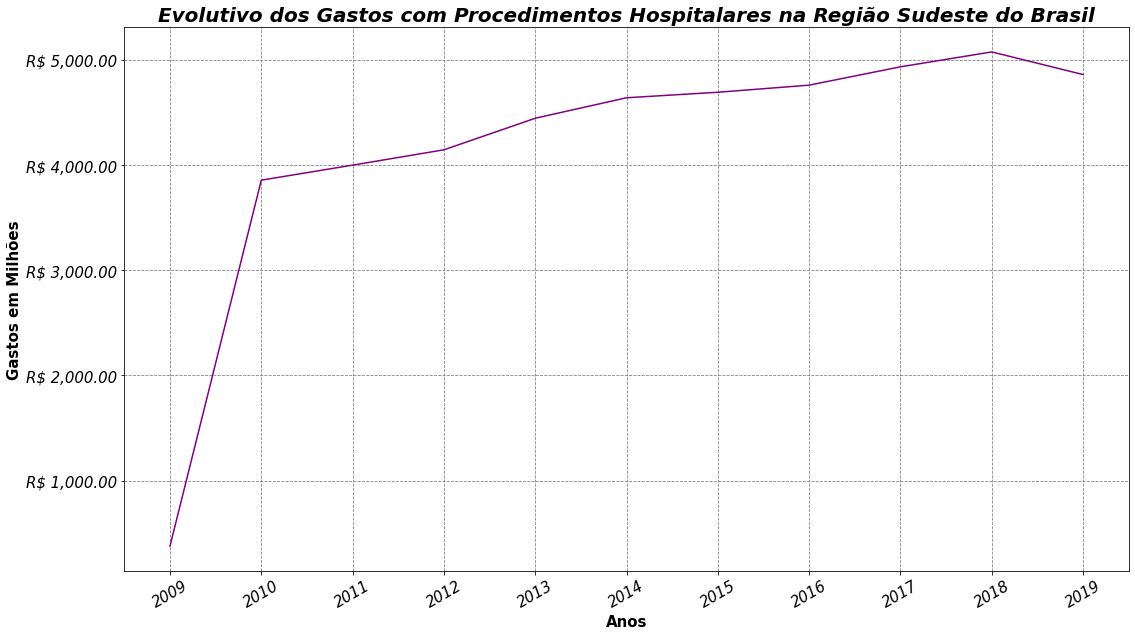

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.figure(figsize=(18,10))
ax = sns.lineplot(data=gasto_ano_fechado, x="ano",y="gasto",color='purple')
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax.set_title('Evolutivo dos Gastos com Procedimentos Hospitalares na Região Sudeste do Brasil', fontsize=20, fontstyle='oblique',fontweight=800)
ax.set_ylabel('Gastos em Milhões', fontsize=15, fontweight=600)
ax.set_xlabel('Anos', fontsize=15, fontweight=600)
plt.grid(True, linestyle = "--", color='gray')
plt.show()

<Figure size 720x720 with 0 Axes>

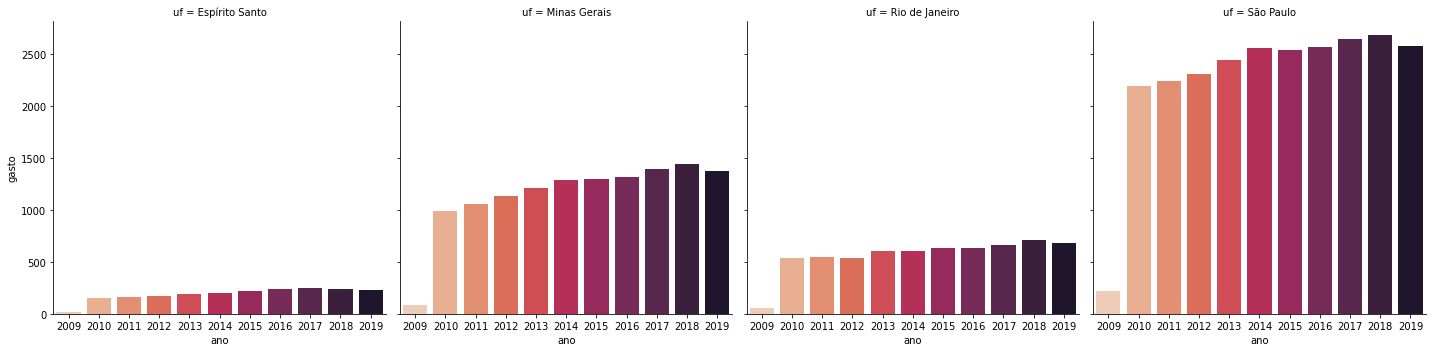

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.catplot(data=gastos_sudeste_ano,x="ano",y="gasto", kind='bar',col="uf", palette=sns.color_palette("rocket_r",11))
plt.show()

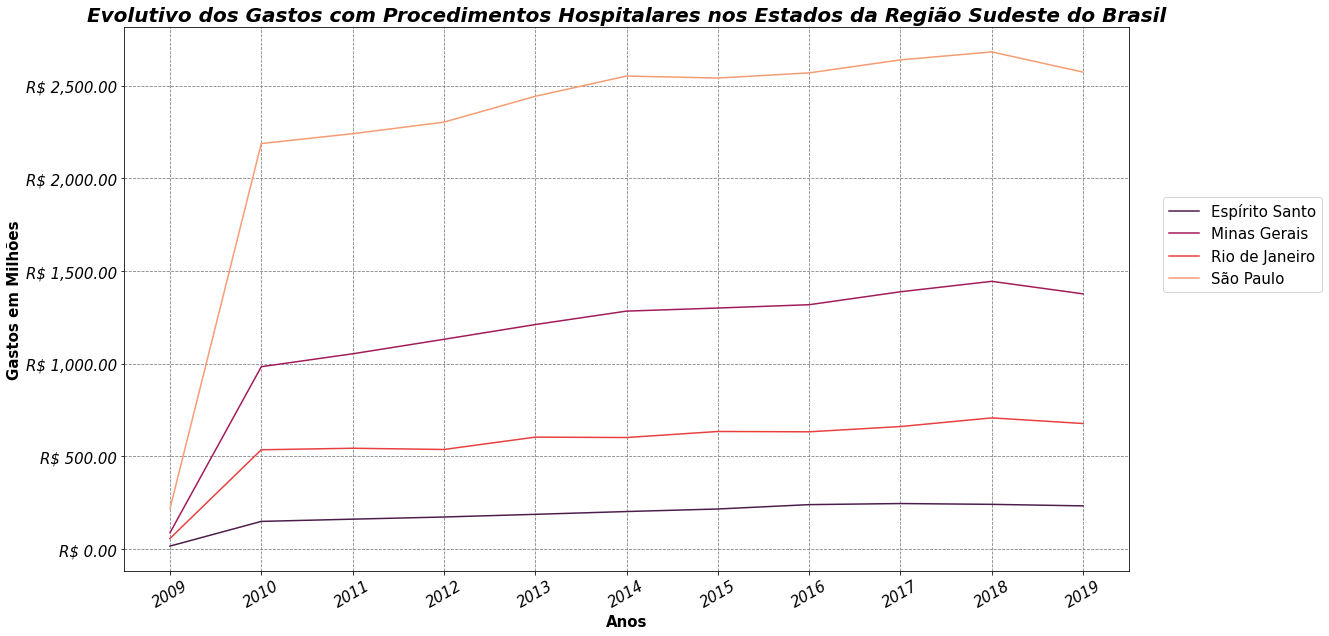

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.lineplot(data=gastos_sudeste_ano, x="ano",y="gasto",hue="uf",palette='rocket')
plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.set_title('Evolutivo dos Gastos com Procedimentos Hospitalares nos Estados da Região Sudeste do Brasil', fontsize=20, fontstyle='oblique',fontweight=800)
ax.set_ylabel('Gastos em Milhões', fontsize=15, fontweight=600)
ax.set_xlabel('Anos', fontsize=15, fontweight=600)
plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
plt.grid(True, linestyle = "--", color='gray')
plt.show()